# Redes Neuronales Recurrentes

Los humanos no comienzan su pensamiento desde cero cada segundo. Al leer este ensayo, entiendes cada palabra según tu comprensión de las palabras anteriores. No tiras todo y comienzas a pensar de nuevo. Tus pensamientos tienen persistencia.

Las redes neuronales tradicionales no pueden hacer esto, y parece una deficiencia importante. Por ejemplo, imagine que desea clasificar qué tipo de evento está sucediendo en cada punto de una película. No está claro cómo una red neuronal tradicional podría usar su razonamiento sobre eventos previos en la película para informar a los posteriores.

Las redes neuronales recurrentes abordan este problema. Son redes con bucles que permiten que la información persista.

<img src="figuras/nodo_rnr.png" width="15%">

En la figura de arriba, un trozo de la red neuronal RN, observa una entrada $x_t$ y genera un valor $s_t$. Un ciclo permite que la información pase de un paso de la red al siguiente.

Estos bucles hacen que las redes neuronales recurrentes parezcan misteriosas. Sin embargo, si piensa un poco más, resulta que no son tan diferentes a una red neuronal normal. Una red neuronal recurrente se puede considerar como copias múltiples de la misma red, cada una pasando un mensaje a un sucesor. Considere lo que sucede si desenrollamos el ciclo:

<img src="figuras/rnr_desenrrollada.png" width="75%">

Esta naturaleza de cadena revela que las redes neuronales recurrentes están íntimamente relacionadas con secuencias y listas. Son la arquitectura natural de una red neuronal para usar para tales datos.

En los últimos años, ha habido un éxito increíble aplicando RNR a una variedad de problemas: reconocimiento de voz, modelado de lenguaje, traducción, subtitulado de imágenes ...

Esencial para estos éxitos es el uso de LSTM (Long Short-Time Memory), un tipo muy especial de red neuronal recurrente que funciona, para muchas tareas, mucho mejor que la versión estándar. Casi todos los mejores resultados basados en redes neuronales recurrentes se logran con ellas. Son estas LSTM las que se explorará a continuación.

### El Problema de las Dependencias a Largo Plazo

Uno de los atractivos de las RNR es la idea de que podrían ser capaces de conectar información previa a la tarea actual, por ejemplo, el uso de los cuadros de video previos podría ayudar a comprender el cuadro actual. Si las RNR pudieran hacer esto, serían extremadamente útiles.

Algunas veces, solo necesitamos ver información reciente para realizar la tarea actual. Por ejemplo, considere un modelo de lenguaje que intente predecir la siguiente palabra en función de las anteriores. Si estamos tratando de predecir la última palabra en "las nubes están en el *cielo*", no necesitamos ningún contexto adicional; es bastante obvio que la próxima palabra será cielo. En tales casos, cuando la brecha entre la información relevante y el lugar que se necesita es pequeña, las RNR pueden aprender a usar la información pasada.

<img src="figuras/dependencia_corta.png" width="75%">

Pero también hay casos en los que necesitamos más contexto. Considere tratar de predecir la última palabra en el texto "Crecí en Francia ... Hablo *francés* con fluidez". La información reciente sugiere que la siguiente palabra es probablemente el nombre de un idioma, pero si queremos reducir el idioma, necesitamos el contexto de Francia, desde atrás. Es completamente posible que exista una brecha entre la información relevante y el punto en el que se necesita que sea muy grande.

Desafortunadamente, a medida que crece esa brecha, las RNN no pueden aprender a conectar la información.

<img src="figuras/dependencia_larga.png" width="75%">

En teoría, las RNR son absolutamente capaces de manejar tales "dependencias a largo plazo". Un humano podría elegir cuidadosamente los parámetros para que resuelvan problemas de juguete de esta forma. Tristemente, en la práctica, las RNR no parecen ser capaces de aprenderlas. El problema fue explorado en profundidad por Hochreiter (1991) [alemán] y Bengio, et al. (1994), quienes encontraron algunas razones bastante fundamentales por las cuales podría ser difícil.

Este problema se puede resolver con las LSTM.

### Redes LSTM

Las redes de memoria de corto y largo plazo, generalmente llamadas "LSTM" del ingles (Long Short Term Memory), son un tipo especial de RNR, capaz de aprender dependencias a largo plazo. Fueron introducidos por Hochreiter y Schmidhuber (1997), y fueron refinadas y popularizadas por muchas personas en trabajos posteriores. Funcionan muy bien en una gran variedad de problemas, y ahora son ampliamente utilizadas.

Las LSTM están diseñados explícitamente para evitar el problema de dependencia a largo plazo. Recordar la información durante largos períodos de tiempo es prácticamente su comportamiento predeterminado.

Todas las redes neuronales recurrentes tienen la forma de una cadena de módulos repetitivos de red neuronal. En RNN estándar, este módulo de repetición tendrá una estructura muy simple, como una sola capa de tanh.

<img src="figuras/estandar_rnr.png" width="75%">

Los LSTM también tienen esta estructura tipo cadena, pero el módulo de repetición tiene una estructura diferente. En lugar de tener una sola capa de red neuronal, hay cuatro, interactuando de una manera muy especial.

<img src="figuras/lstm_rnr.png" width="100%">

Notación:

<img src="figuras/notacion_lstm.png" width="75%">

En la figura de arriba, cada línea lleva un vector completo, desde la salida de un nodo hasta las entradas de otros. Los círculos verdes representan operaciones puntuales, como la adición de vectores, mientras que los cuadros amarillos son capas entrenadas de redes neuronales. Las líneas que se unen denotan concatenación, mientras que una línea de bifurcación denota que su contenido se copia y las copias van a diferentes ubicaciones.

### La idea central detrás de los LSTM

La clave para las LSTM es el estado de la celda, la línea horizontal que se extiende por la parte superior de la figura.

El estado de la celda es como una cinta transportadora. Corre directamente por toda la cadena, con solo algunas interacciones lineales menores. Es muy fácil que la información fluya sin cambios

<img src="figuras/estado_celda.png" width="50%">

La LSTM tiene la capacidad de eliminar o agregar información al estado de la celda, cuidadosamente regulado por estructuras llamadas compuertas.

Las compuertas son una forma de dejar pasar la información. Se componen de una capa de red neuronal con activación sigmoide y una operación de multiplicación puntual.

<img src="figuras/compuerta_lstm.png" width="15%">

La salida de capa con activación sigmoide son números entre cero y uno, que describe la cantidad que se debe dejar pasar cada componente. Un valor de cero significa "no dejar pasar nada", mientras que un valor de uno significa "dejar pasar todo"

Una LSTM tiene tres de estas compuertas, para proteger y controlar el estado de la celda.

### Recorrido paso a paso de una LSTM 

El primer paso en nuestra LSTM es decidir qué información vamos a olvidar/recordar del estado de la celda. Esta decisión es tomada por una capa con activación sigmoide llamada "capa de compuerta de olvido". Basado en los valores de $s_{t-1}$ y $x_t$, genera un número entre 0 y 1 para cada número del estado de la celda $C_{t-1}$. Un 1 representa "mantener esto por completo", mientras que un 0 representa "deshacerse por completo de esto".

Regresemos a nuestro ejemplo de un modelo de lenguaje que intenta predecir la siguiente palabra en base a todas las anteriores. En tal problema, el estado de la celda puede incluir el género del sujeto presente, de modo que puedan usarse los pronombres correctos. Cuando vemos un sujeto nuevo, queremos olvidar el género del sujeto anterior.

<img src="figuras/compuerta_olvidar.png" width="75%">

El siguiente paso es decidir qué nueva información vamos a almacenar en el estado de la celda. Esto tiene dos partes. Primero, una capa sigmoide llamada "compuerta capa de entrada" decide qué valores actualizaremos. A continuación, una capa $tanh$ crea un vector de nuevos valores candidatos, $\tilde{C}_t$, que podrían agregarse al estado. En el siguiente paso, combinaremos estos dos para crear la actualización del estado.

En el ejemplo de nuestro modelo de lenguaje, nos gustaría agregar el género del nuevo sujeto al estado de la celda, para reemplazar el anterior que estamos olvidando.

<img src="figuras/compuerta_actualizar.png" width="75%">

Ahora es el momento de actualizar el estado de celda anterior, $C_{t-1}$, en el nuevo estado de celda $C_t$. Los pasos anteriores ya decidieron qué hacer, solo tenemos que hacerlo.

Multiplicamos el estado anterior por $f_t$, olvidando las cosas que decidimos olvidar antes. Luego le sumamos $i_t * \tilde{C}_t$. Estos son los nuevos valores candidatos, ajustados por cuánto decidimos actualizar cada valor de estado.

En el caso del modelo de lenguaje, aquí es donde dejamos caer la información sobre el género del sujeto anterior y agregamos la nueva información, como decidimos en los pasos anteriores.

<img src="figuras/actualizar_estado.png" width="75%">

Finalmente, tenemos que decidir qué vamos a generar. Este resultado se basará en el estado de celda, pero será una versión filtrada. Primero, ejecutamos una capa con activación sigmoide que decide qué partes del estado de la celda vamos a generar. Luego, ponemos el estado de la celda a través de una función `tanh` (para ajustar los valores entre -1 y 1) y posteriormente se multiplican por la salida de la compuerta sigmoide, de modo que solo se genererarán las partes que decidamos.

Para el ejemplo del modelo de lenguaje, dado que acaba de ver un tema, es posible que desee generar información relevante para un verbo, en caso de que eso sea lo que viene a continuación. Por ejemplo, podría mostrar si el sujeto es singular o plural, de modo que sabemos en qué forma debe conjugarse un verbo si eso es lo que sigue a continuación.

<img src="figuras/salida_celda.png" width="75%">

## Ejemplo de una Red Neuronal Recurrente

Ejemplo adaptado del siguiente artículo en medium: https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767

### Inicialización

Construiremos un RNR sencilla que recuerde los datos de entrada y luego los repita después de unos pocos pasos de tiempo. Primero establezcamos algunas constantes que necesitaremos, lo que quieren decir se aclarará en un momento.

In [13]:
#%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epocas = 100
longitud_total_series = 50000
longitud_truncada_backprop = 15
tamaño_estado = 4
num_clases = 2
paso_eco = 3
tamaño_lote = 5
num_lotes = longitud_total_series//tamaño_lote//longitud_truncada_backprop

### Generar los datos

Generar los datos de entrenamiento, la entrada es básicamente un vector binario aleatorio. La salida será el "eco" de la entrada, pasos de `pasos_eco` desplazados a la derecha.

In [2]:
def generateData():
    x = np.array(np.random.choice(2, longitud_total_series, p=[0.5, 0.5]))
    y = np.roll(x, paso_eco)
    y[0:paso_eco] = 0

    x = x.reshape((tamaño_lote, -1))  # El primer indice es el que cambia más lento, las subseries como filas
    y = y.reshape((tamaño_lote, -1))
    
    return (x, y)

Observe el cambio de la forma de los datos en una matriz con filas `tamaño_lote`. Las redes neuronales se entrenan al aproximar el gradiente de la función de pérdida con respecto a los pesos neuronales, al observar solo un pequeño subconjunto de los datos, también conocido como *mini-lote*. La remodelación toma todo el conjunto de datos y lo pone en una matriz, que más tarde se dividirá en estos mini lotes.

## Construir el grafo computacional

TensorFlow funciona construyendo primero un gráfico computacional, que especifica qué operaciones se realizarán. La entrada y la salida de este gráfico son típicamente matrices multidimensionales, también conocidas como tensores. El gráfico, o partes de él, se pueden ejecutar iterativamente en una sesión, esto se puede hacer en la CPU, GPU o incluso en un servidor remoto

### Variables y Placeholders

Las dos estructuras de datos básicas de TensorFlow que se usarán en este ejemplo son los *placeholders* y las variables. En cada ejecución, los datos del lote se alimentan a los *placeholders*, que son *nodos de inicio* del gráfico computacional. Además, el estado RNR se suministra en un *placeholders*, que se guarda de la salida de la ejecución anterior.

In [3]:
loteX_placeholder = tf.placeholder(tf.float32, [tamaño_lote, longitud_truncada_backprop])
loteY_placeholder = tf.placeholder(tf.int32, [tamaño_lote, longitud_truncada_backprop])

iniciar_estado = tf.placeholder(tf.float32, [tamaño_lote, tamaño_estado])

Los pesos y los sesgos de la red se declaran como variables de TensorFlow, lo que los hace persistentes en todas las ejecuciones y les permite actualizarse incrementalmente para cada lote.

In [4]:
W1 = tf.Variable(np.random.rand(tamaño_estado+1, tamaño_estado), dtype=tf.float32)
b1 = tf.Variable(np.zeros((1,tamaño_estado)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(tamaño_estado, num_clases),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_clases)), dtype=tf.float32)

La figura siguiente muestra la matriz de datos de entrada, y el lote actual `loteX_placeholder` está en el rectángulo punteado. Como veremos más adelante, esta "ventana lote" se desliza `longitud_truncada_backprop` pasos a la derecha en cada ejecución, de ahí la flecha. En nuestro ejemplo a continuación `tamaño_lote = 3`, `longitud_truncada_backprop = 3` y `longitud_total_series = 36`. Tenga en cuenta que estos números son solo para fines de visualización, los valores son diferentes en el código. El índice de orden de serie se muestra como números en los puntos de datos.

<img src="figuras/puntos_datos_entrenamiento.png" width="75%">

### Desempacando

Ahora es el momento de construir la parte del gráfico que se asemeja al cálculo real de la RNR, primero queremos dividir los datos del lote en pasos de tiempo adyacentes.

In [5]:
# Desempacar columnas
series_entradas = tf.unstack(loteX_placeholder, axis=1)
series_etiquetas = tf.unstack(loteY_placeholder, axis=1)

Como puede ver en la siguiente figura, se realiza desempacando las columnas (eje = 1) del lote en una lista de Python. El RNR entrenará simultáneamente en diferentes partes de la serie temporal; los pasos 4 a 6, 16 a 18 y 28 a 30 en el ejemplo de lote actual. La razón para usar los nombres de variables en "plural" tal como "series" es enfatizar que la variable es una lista que representa una serie temporal con múltiples entradas en cada paso.

<img src="figuras/desempacado.png" width="50%">

El hecho de que el entrenamiento se realice simultáneamente en tres lugares en nuestras series temporales, nos exige guardar tres instancias de estados cuando se propague hacia adelante. Eso ya se ha tomado en cuenta, ya que se ve que el *placeholder* `iniciar_estado` tiene filas `tamaño_lote`.

### Propagación Hacia Adelante

A continuación, construyamos la parte del grafo que hace el cálculo actual de la RNR 

In [6]:
# Propagación hacia adelante
estado_actual = iniciar_estado
series_estados = []
for entrada_actual in series_entradas:
    entrada_actual = tf.reshape(entrada_actual, [tamaño_lote, 1])
    entrada_y_estado_concatenado = tf.concat([entrada_actual, estado_actual], 1)  # Incrementar número de columnas
    proximo_estado = tf.tanh(tf.matmul(entrada_y_estado_concatenado, W1) + b1)  # Suma expandida
    series_estados.append(proximo_estado)
    estado_actual = proximo_estado

Observe la concatenación en la línea 6, lo que realmente queremos hacer es calcular la suma de dos transformaciones afines entrada_actual * $W_a$ + estado_actual * $W_b$ en la figura siguiente. Al concatenar esos dos tensores, solo se usará una multiplicación de matrices. La adición del sesgo b se expande "broadcast" a todas las muestras del lote.

<img src="figuras/concatenar.png" width="75%">

¿Que significa el nombre de la variable longitud_truncada_backprop?. Cuando se entrena un RNR, en realidad se trata como una red neuronal profunda con pesos recurrentes en cada capa. Estas capas no se desenrollarán hasta el comienzo del tiempo, eso sería demasiado costoso desde el punto de vista informático y, por lo tanto, se truncarán en un número limitado de pasos de tiempo. En nuestro esquema de ejemplo anterior, el error se propaga hacia atrás por tres pasos para el lote.

### Calcular la perdida

Esta es la parte final del grafo, una capa de softmax completamente conectada desde el estado al resultado que hará que las clases sean codificadas _one-hot_, y luego calculando la pérdida del lote.

In [7]:
logits_series = [tf.matmul(estado, W2) + b2 for estado in series_estados] # Suma expandida "Broadcasted"
predicciones_series = [tf.nn.softmax(logits) for logits in logits_series]

perdidas = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=etiquetas) for logits, etiquetas in zip(logits_series, series_etiquetas)]
perdida_total = tf.reduce_mean(perdidas)

paso_entrenamiento = tf.train.AdagradOptimizer(0.3).minimize(perdida_total)

Observe la llamada API a `sparse_softmax_cross_entropy_with_logits`, automáticamente calcula el softmax internamente y luego calcula la entropía cruzada. En nuestro ejemplo, las clases son mutuamente excluyentes (son cero o uno), que es la razón para usar el "Sparse-softmax", puede leer más sobre él en la API. El uso es tener `logits` de la forma `[tamaño_lote, num_clases]` y etiquetas de la forma `[tamaño_lote]`.

### Visualización del Entrenamiento

Definir una función de visualización para que podamos ver qué está sucediendo en la red mientras entrenamos. Trazará la pérdida a lo largo del tiempo, mostrará la entrada de entrenamiento, la salida de entrenamiento y las predicciones actuales de la red sobre diferentes series de ejemplos en un lote de entrenamiento.

In [8]:
def plot(lista_perdidas, predicciones_series, loteX, loteY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(lista_perdidas)

    for lote_series_idx in range(5):
        salida_one_hot_series = np.array(predicciones_series)[:, lote_series_idx, :]
        salida_sencilla_series = np.array([(1 if salida[0] < 0.5 else 0) for salida in salida_one_hot_series])

        plt.subplot(2, 3, lote_series_idx + 2)
        plt.cla()
        plt.axis([0, longitud_truncada_backprop, 0, 2])
        left_offset = range(longitud_truncada_backprop)
        plt.bar(left_offset, loteX[lote_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, loteY[lote_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, salida_sencilla_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

### Ejecutar la Sesión de Entrenamiento

Es hora de concluir y entrenar la red, en TensorFlow el grafo se ejecuta en una sesión. Se generan nuevos datos en cada época (no es la forma habitual de hacerlo, pero funciona en este caso, ya que todo es predecible).

<Figure size 432x288 with 0 Axes>

Nueva data, epoca 0
Paso 0 Perdida 0.698575


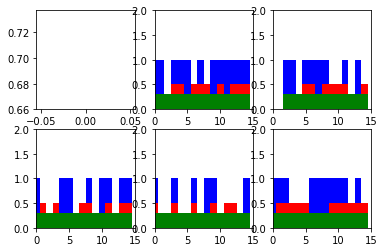

Paso 100 Perdida 0.7025214


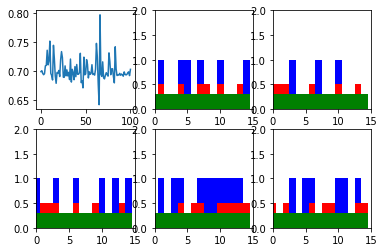

Paso 200 Perdida 0.68414456


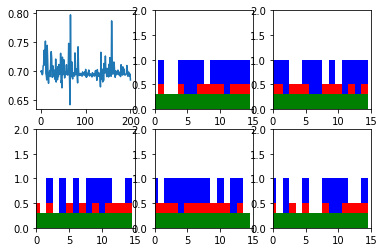

Paso 300 Perdida 0.69313127


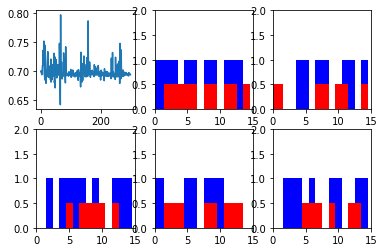

Paso 400 Perdida 0.69223684


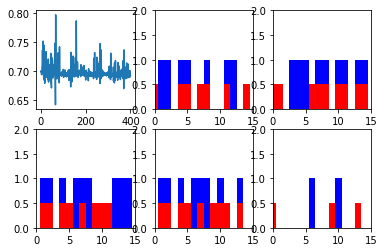

Paso 500 Perdida 0.14646389


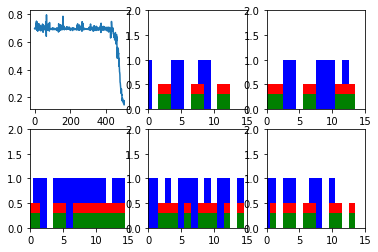

Paso 600 Perdida 0.028261168


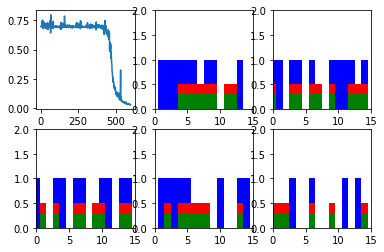

Nueva data, epoca 1
Paso 0 Perdida 0.1683969


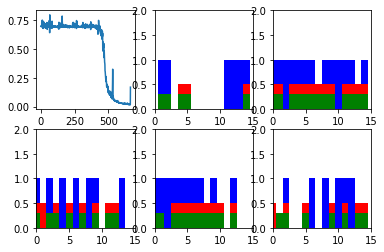

Paso 100 Perdida 0.012796184


KeyboardInterrupt: 

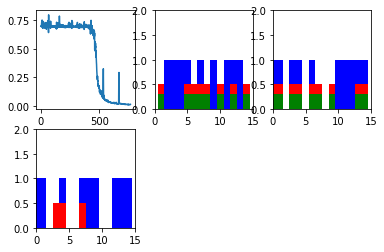

In [14]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    lista_perdidas = []

    for epoca_idx in range(num_epocas):
        x,y = generateData()
        _estado_actual = np.zeros((tamaño_lote, tamaño_estado))

        print("Nueva data, epoca", epoca_idx)

        for lote_idx in range(num_lotes):
            inicio_idx = lote_idx * longitud_truncada_backprop
            fin_idx = inicio_idx + longitud_truncada_backprop

            loteX = x[:,inicio_idx:fin_idx]
            loteY = y[:,inicio_idx:fin_idx]

            _perdida_total, _paso_entrenamiento, _estado_actual, _predicciones_series = sess.run(
                [perdida_total, paso_entrenamiento, estado_actual, predicciones_series],
                feed_dict={
                    loteX_placeholder:loteX,
                    loteY_placeholder:loteY,
                    iniciar_estado:_estado_actual
                })

            lista_perdidas.append(_perdida_total)

            if lote_idx%100 == 0:
                print("Paso", lote_idx, "Perdida", _perdida_total)
                plot(lista_perdidas, _predicciones_series, loteX, loteY)

plt.ioff()
plt.show()

Puede ver que estamos moviendo `longitud_truncada_backprop` pasos adelante en cada iteración (línea 15-19), pero es posible tener diferentes pasos.  La desventaja de hacer esto es que `longitud_truncada_backprop` necesita ser significativamente más grande que las dependencias de tiempo (tres pasos en nuestro caso) para encapsular los datos de entrenamiento relevantes. De lo contrario, podría haber muchas "fallas", como puede ver en la figura siguiente.

<img src="figuras/serie_tiempo.png" width="50%">



## Referencias:

- [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [How to build a Recurrent Neural Network in TensorFlow](https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767)
- [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)